In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Error Data Analysis

In [105]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [106]:
df.head()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,material,encoded_material,error
0,-0.211129,0.168903,145.678574,10.307022,132.250000,12.904884,215.300003,11.049919,5.009119,151.291672,10.978348,5.037270,cardboard,1,-0.044354
1,-0.197054,0.206438,134.321426,10.824654,131.250000,12.686867,192.000000,11.397888,5.027886,196.916672,9.907471,5.037270,cardboard,1,-0.030278
2,-0.197054,0.206438,134.321426,10.824654,115.535713,11.384682,236.149994,9.844360,5.065420,247.300003,10.009239,5.074803,cardboard,1,-0.030278
3,-0.248663,0.206438,104.107140,11.064209,123.500000,12.628738,236.149994,9.844360,5.065420,247.300003,10.009239,5.074803,cardboard,1,-0.081888
4,-0.182979,0.206438,113.250000,10.954155,144.916672,12.631165,185.000000,10.330307,5.027886,140.041672,10.649246,5.074803,cardboard,1,-0.016203


In [107]:
# drop uncomplete rows
df.dropna(inplace=True)

# drop categorical 'material' column
# df.drop('material', axis=1, inplace=True)

# drop categorical 'encoded_material' column
df.drop('encoded_material', axis=1, inplace=True)

In [108]:
df['material'].unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

## Statistical Analysis

In [109]:
# save error data
error_df = df[['error', 'material']]

In [110]:
# split to subsets
cardboard_df = df[df['material'] == 'cardboard']
foam_df = df[df['material'] == 'foam']
metal_df = df[df['material'] == 'metal']
plastic_df = df[df['material'] == 'plastic']
wooden_cabinet_df = df[df['material'] == 'wooden-cabinet']
wooden_shelf_df = df[df['material'] == 'wooden-shelf']

In [111]:
# Function to plot the data characteristics
def plot(data, name, output_directory='plots/'):

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Select only the numerical columns for plotting
    numerical_columns = data.select_dtypes(include=['number'])

    # Determine the number of rows and columns for the subplots
    num_rows = int(len(numerical_columns.columns) / 2) + 1  # Adjust as needed
    num_cols = 2  # You can change the number of columns as per your preference

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

    # Flatten the axes if necessary (in case there's only one row or column)
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    elif num_cols == 1:
        axes = axes.reshape(-1, 1)

    # Loop through each numerical column and create a histogram in a subplot
    for i, column in enumerate(numerical_columns.columns):
        row_index = i // num_cols
        col_index = i % num_cols
        ax = axes[row_index, col_index]

        ax.hist(data[column], bins=20, color='steelblue')  # Adjust the number of bins as needed
        ax.axvline(data[column].mean(), color='red', linestyle='dashed', linewidth=2)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

        # Add a legend for the mean line
        ax.legend([f'Mean = {data[column].mean():.2f}'], loc='upper right')

    # Remove any empty subplots
    for i in range(len(numerical_columns.columns), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust the layout and spacing
    plt.tight_layout()

    # Save the plot as a PNG file in the specified output directory
    plot_filename = os.path.join(output_directory, f'{name}.png')
    plt.savefig(plot_filename, dpi=300)  # Adjust the dpi as needed

    # Show the plot
    plt.show()


In [112]:
cardboard_df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000
mean,-0.155725,0.080025,135.396872,10.492294,128.416378,12.552538,203.261734,10.767060,5.042727,194.213306,10.590129,5.042428,0.011160
std,0.051107,5.298092,18.991677,1.161117,17.063611,1.059582,29.777857,0.684330,0.019402,29.572490,0.981167,0.019349,0.051103
min,-0.431642,-373.351807,12.875000,-4.872566,12.958333,-5.468216,4.407227,-2.622902,4.980968,0.118671,-34.036953,4.976276,-0.264705
25%,-0.187671,0.121986,124.035713,10.365005,118.071426,12.503021,182.489582,10.402718,5.027886,174.333328,10.352610,5.027886,-0.020756
50%,-0.154828,0.159520,135.232140,10.576656,127.404762,12.664883,202.250000,10.735382,5.041961,194.250000,10.637604,5.041961,0.011981
75%,-0.121986,0.187671,146.928574,10.803133,140.916672,12.804354,226.850006,11.158546,5.056036,217.462498,10.906578,5.056036,0.044790
max,0.065685,0.422259,209.250000,29.578590,184.000000,32.121307,315.062500,12.249138,5.145180,307.687500,36.156631,5.117029,0.232460


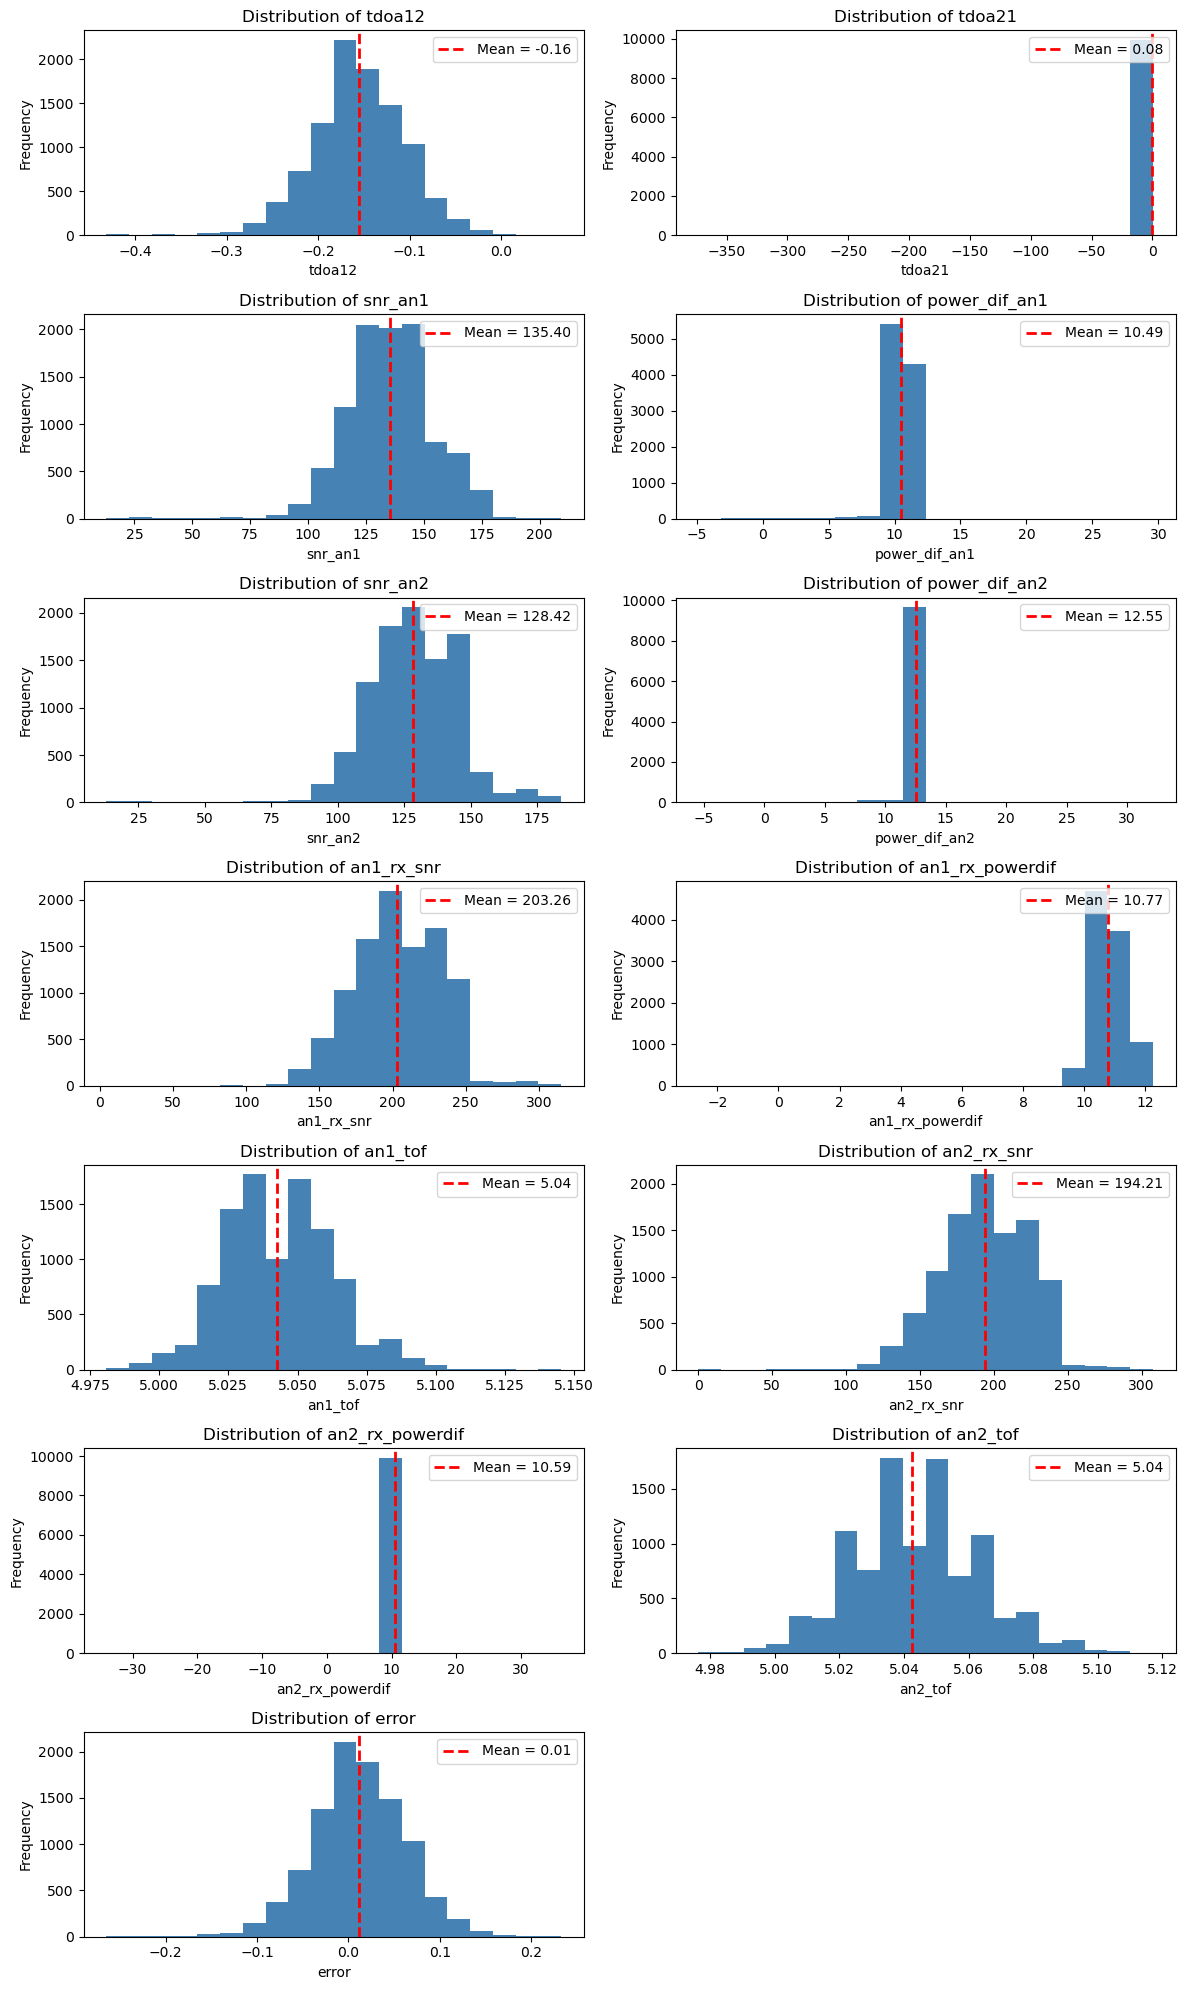

In [113]:
plot(data=cardboard_df, name='cardboard')

In [114]:
foam_df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000
mean,-0.161856,0.160091,139.447510,10.411348,127.142678,12.644091,206.049899,10.639239,5.044528,195.952486,10.523827,5.044071,0.004762
std,0.051781,0.052537,27.548105,1.388900,17.804718,1.175808,29.573028,0.882566,0.019796,29.553796,0.642946,0.019535,0.051803
min,-0.464485,-0.178287,12.339286,-6.842743,15.321428,-6.336067,8.308712,-30.426292,4.966893,66.750000,-2.346466,4.966893,-0.297605
25%,-0.192362,0.126678,119.500000,9.854660,115.678574,12.590553,185.833328,10.254135,5.032578,175.875000,10.213272,5.032578,-0.026127
50%,-0.159520,0.159520,137.156250,10.737389,126.321426,12.771233,205.399994,10.612000,5.041961,195.550003,10.549835,5.041961,0.006715
75%,-0.126678,0.192362,158.428574,11.171928,140.375000,12.931778,229.699997,11.050415,5.056036,219.500000,10.877441,5.056036,0.039558
max,0.051609,0.370649,249.649994,31.497238,183.399994,30.931198,316.687500,12.373199,5.117029,301.437500,11.750099,5.117029,0.218489


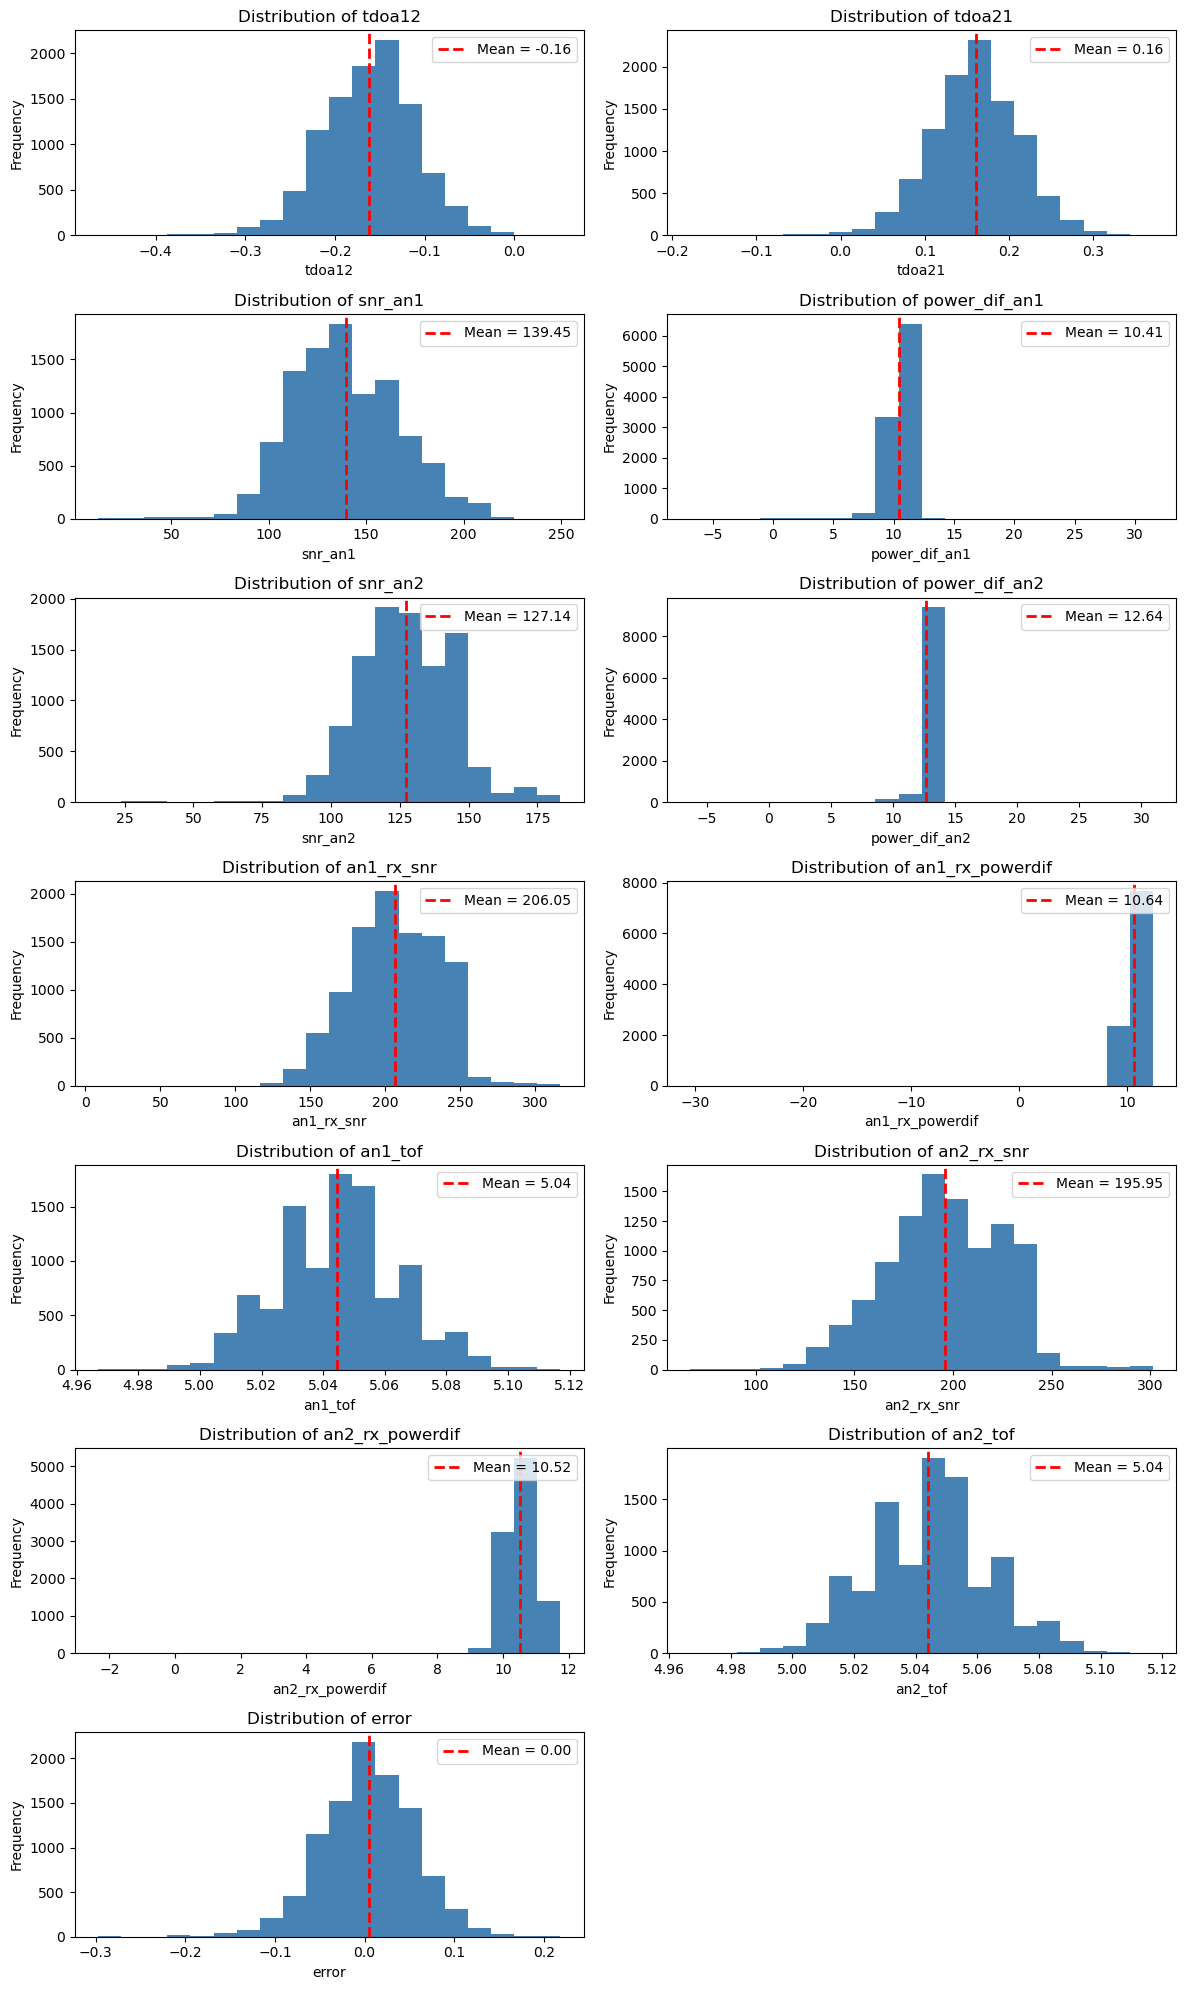

In [115]:
plot(data=foam_df, name='foam')

In [116]:
metal_df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000
mean,-0.536529,0.508401,23.529326,23.760917,138.974083,11.660521,183.098345,13.432198,5.058623,183.142901,12.890796,5.057721,-0.369693
std,0.365962,0.154526,5.823712,2.419110,19.189385,1.105777,27.107661,0.685138,0.022080,29.760179,0.896864,0.021916,0.365915
min,-9.580582,0.145445,6.208333,-0.551544,15.000000,-4.373871,5.658163,0.672668,4.985660,4.875000,-29.104488,4.976276,-9.413460
25%,-0.586470,0.398800,19.468750,22.587286,126.821426,11.543577,165.026791,13.049780,5.041961,164.333328,12.633320,5.041961,-0.419722
50%,-0.473868,0.473868,22.500000,24.288200,137.904762,11.813099,182.166672,13.493881,5.056036,184.270836,12.914658,5.056036,-0.306747
75%,-0.398800,0.581779,26.583334,25.491037,152.875000,12.062243,202.162495,13.866066,5.074803,205.149994,13.232071,5.070112,-0.232428
max,-0.168903,4.077143,51.299999,28.534538,202.649994,28.912659,287.312500,15.155426,5.145180,302.125000,14.480415,5.145180,-0.001321


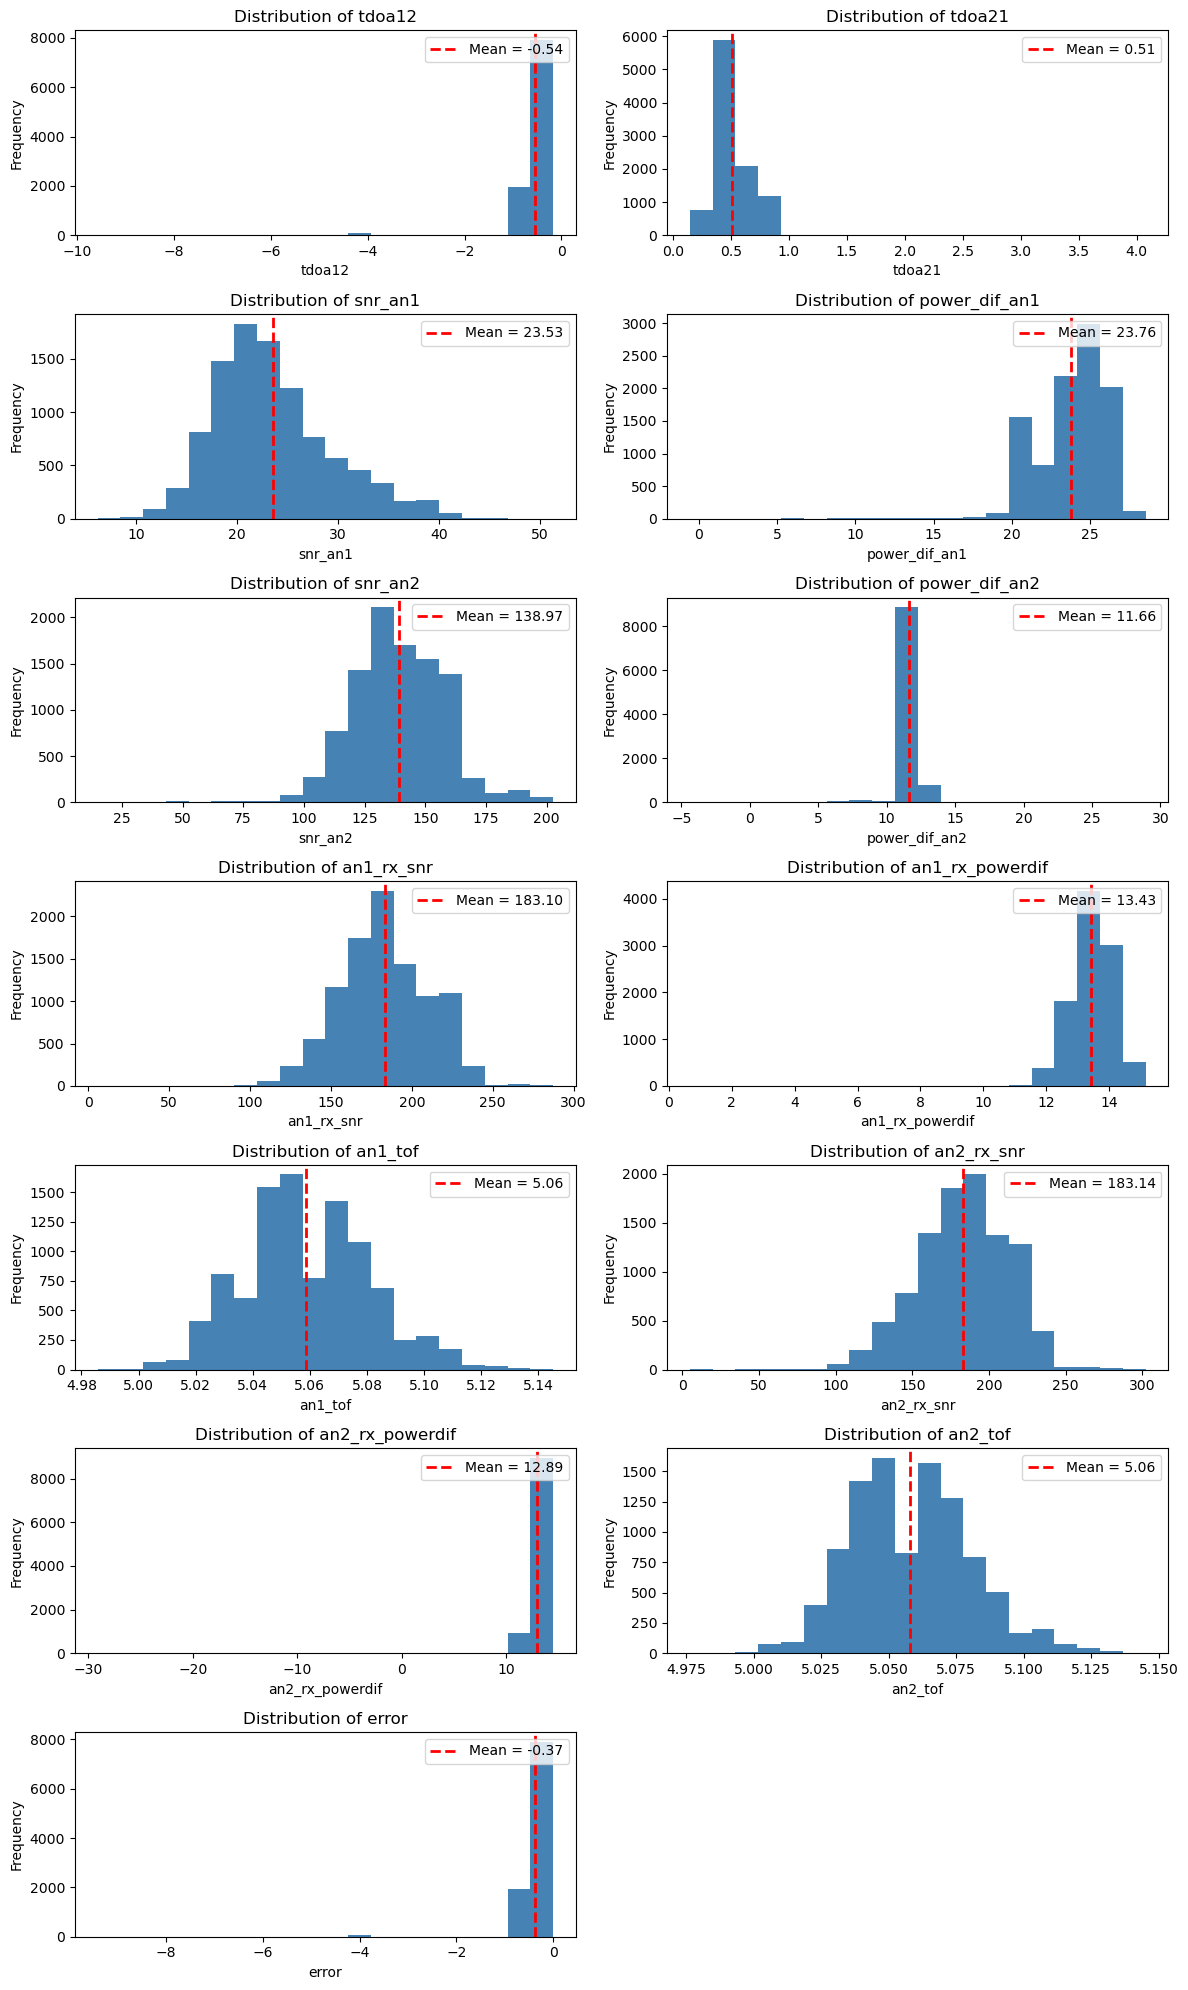

In [117]:
plot(data=metal_df, name='metal')

In [118]:
plastic_df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,-0.198787,0.198841,114.201452,11.647303,130.781039,12.474628,207.194691,10.503508,5.045146,196.865867,10.373601,5.044293,-0.031528
std,0.059765,0.058735,21.097740,1.471531,17.839825,1.244370,30.345781,0.813179,0.019810,30.977886,0.801987,0.019738,0.059716
min,-0.487943,-0.117294,9.833333,-17.027435,16.666666,-3.869690,6.404830,-31.256706,4.985660,7.000000,-35.275032,4.966893,-0.320594
25%,-0.234588,0.159520,100.110121,11.133860,119.535713,12.423704,186.625000,10.121979,5.032578,176.297920,10.067953,5.032578,-0.067756
50%,-0.197054,0.201746,115.821426,11.499626,129.964279,12.661385,206.399994,10.485550,5.046653,196.833328,10.409172,5.041961,-0.029881
75%,-0.159520,0.239280,128.464279,12.283293,144.416672,12.877937,231.399994,10.917568,5.060728,221.300003,10.776834,5.056036,0.007312
max,0.286198,0.431642,196.850006,28.825500,189.399994,32.333527,320.312500,12.058670,5.117029,312.687500,11.556030,5.112338,0.453030


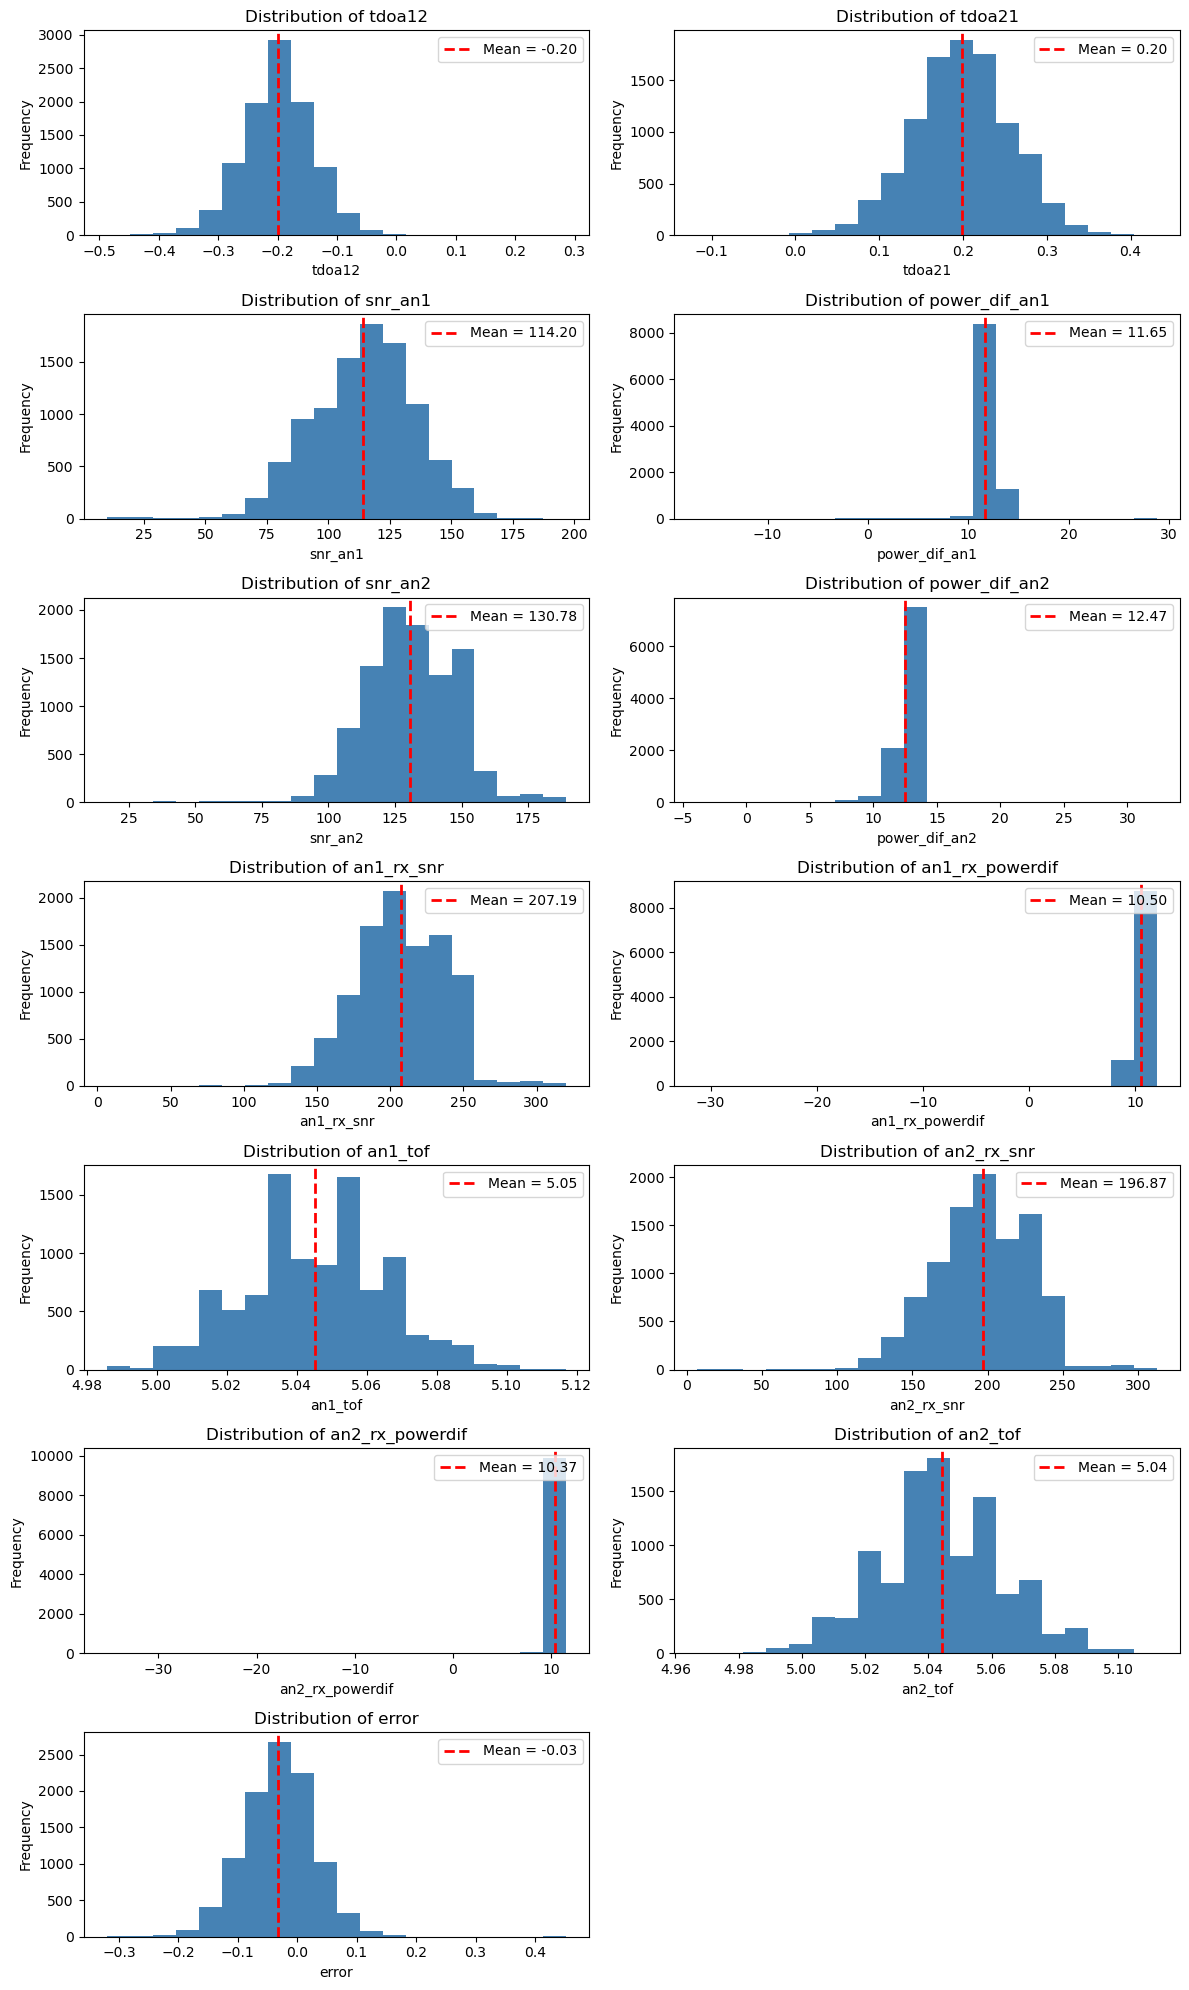

In [119]:
plot(data=plastic_df, name='plastic')

In [120]:
wooden_cabinet_df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000
mean,-0.240029,0.238395,85.674172,14.009951,129.625425,13.082777,209.865718,10.434953,5.028849,198.598477,10.357909,5.027078,-0.073620
std,0.122762,0.098042,25.245603,1.944664,18.526667,1.428369,31.062930,0.711081,0.020320,30.210906,0.643265,0.020104,0.122787
min,-7.492747,-0.234588,9.958333,-4.805908,9.000000,-6.979210,7.702532,-5.802277,4.957510,53.500000,-2.437965,4.952817,-7.326255
25%,-0.304965,0.168903,65.214287,12.520279,117.928574,12.993752,187.899994,10.044495,5.013811,178.666672,9.974266,5.013811,-0.138625
50%,-0.225205,0.225205,83.107140,14.290092,129.250000,13.217262,209.833328,10.385452,5.027886,199.050003,10.357796,5.027886,-0.058839
75%,-0.168903,0.304965,106.321426,15.129761,143.333328,13.442963,234.300003,10.826775,5.041961,221.149994,10.783478,5.041961,-0.002411
max,0.056301,0.609929,176.199997,30.359978,191.649994,32.832855,320.687500,12.338203,5.117029,314.875000,11.933739,5.107646,0.222793


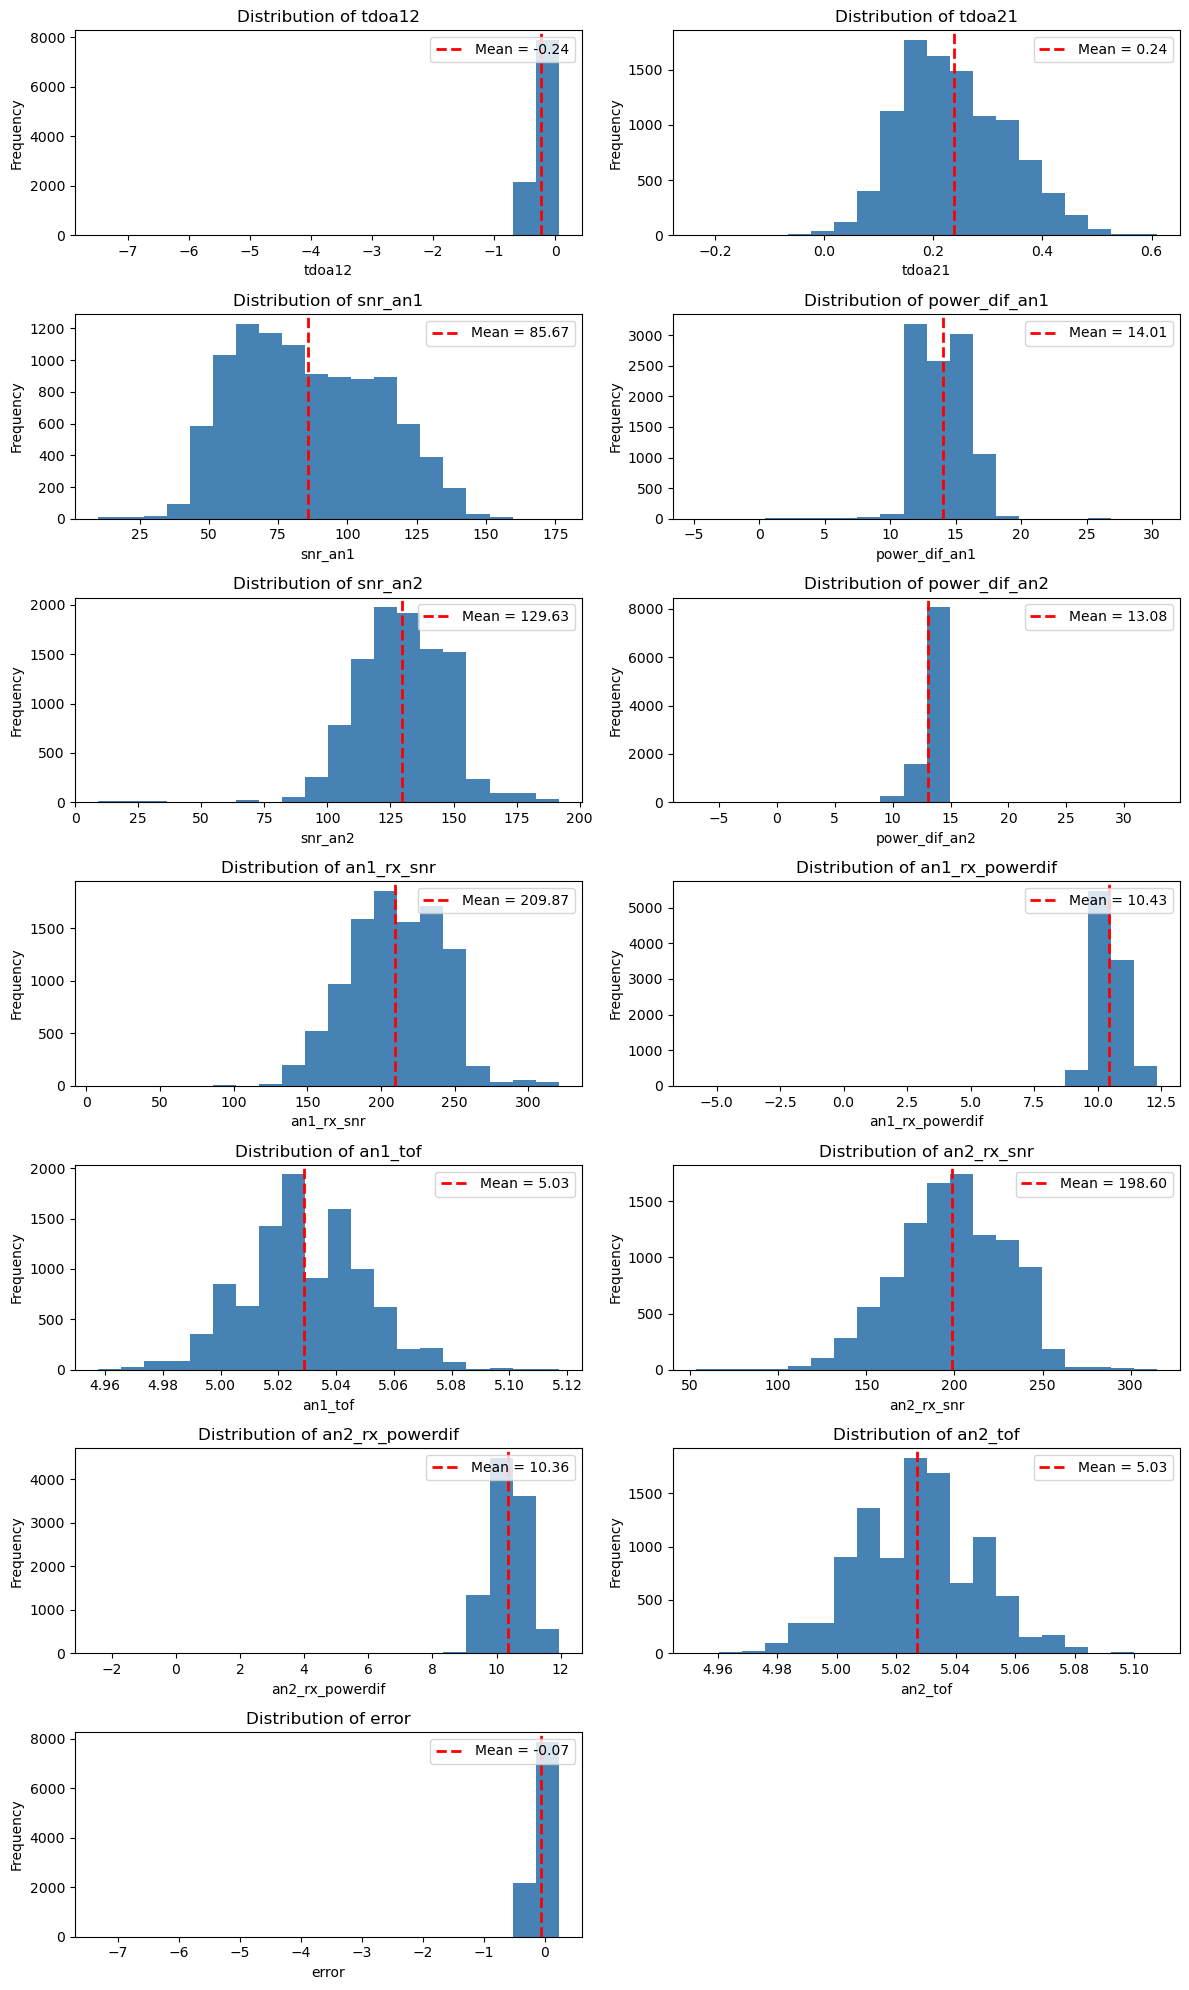

In [121]:
plot(data=wooden_cabinet_df, name='wooden_cabinet')

In [122]:
wooden_shelf_df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000
mean,-0.278052,0.276798,154.389774,9.800439,142.334156,11.852321,209.592365,10.920242,5.044513,197.716100,10.984756,5.043213,-0.110437
std,0.086721,0.087814,37.483435,2.264465,18.569929,1.152925,30.524158,0.720689,0.020663,30.907688,0.814868,0.020325,0.086908
min,-0.736607,-0.042226,15.291667,-3.544296,15.285714,-3.335548,5.105469,-2.332947,4.962201,3.548828,-31.136414,4.957510,-0.569391
25%,-0.323732,0.215821,129.208328,10.166321,131.250000,11.775459,189.149994,10.496964,5.032578,177.000000,10.623444,5.027886,-0.156120
50%,-0.262739,0.262739,148.000000,10.702225,141.285721,11.957886,208.949997,10.905312,5.046653,197.666672,11.051392,5.041961,-0.095127
75%,-0.215821,0.323732,172.916672,11.096031,155.750000,12.112282,234.300003,11.376312,5.056036,221.250000,11.425362,5.056036,-0.048209
max,-0.028151,0.563012,326.200012,30.402084,214.875000,31.053261,330.000000,12.795105,5.112338,314.750000,12.351578,5.117029,0.139596


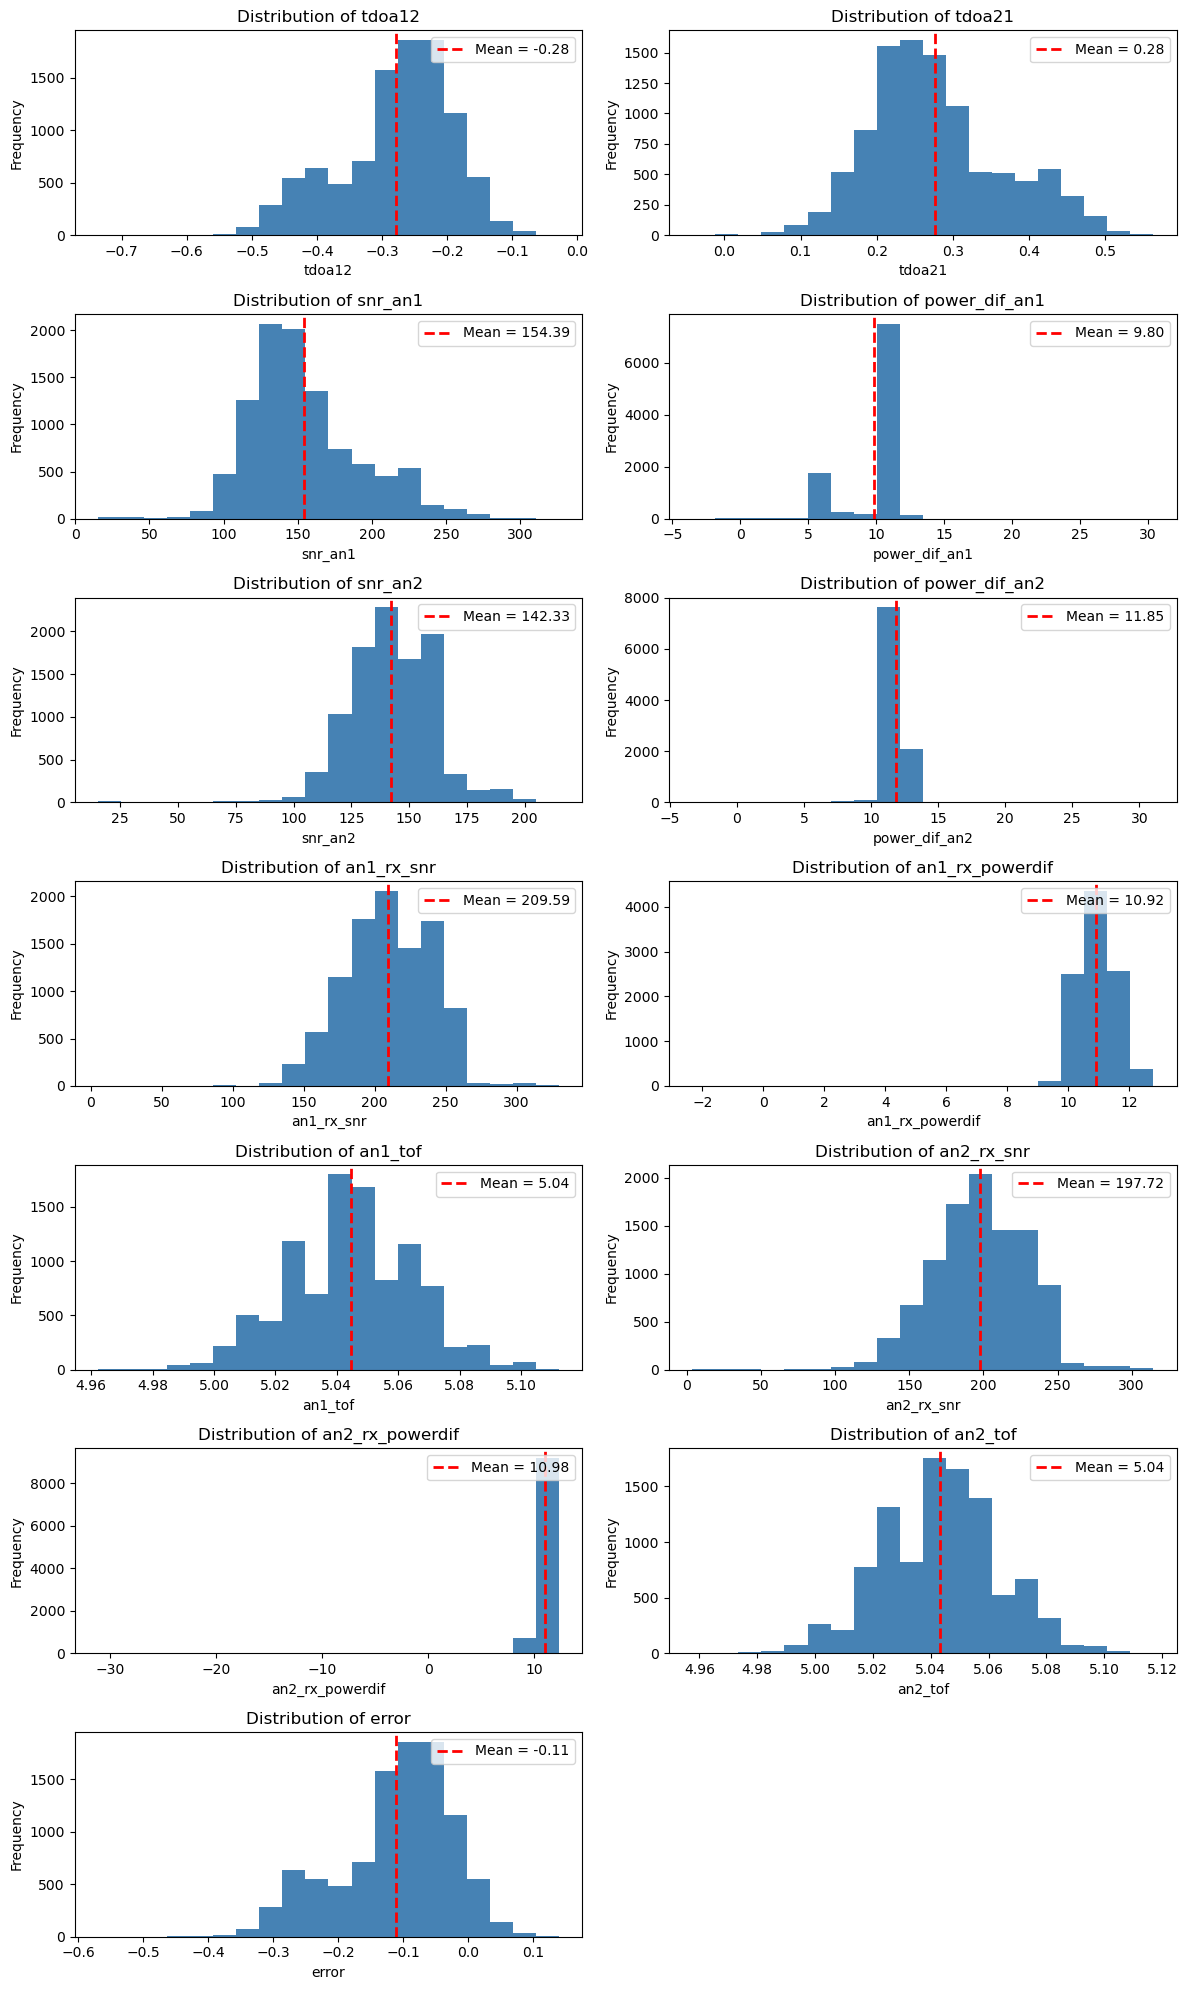

In [123]:
plot(data=wooden_shelf_df, name='wooden_shelf')

## Correlation Analysis

In [124]:
# drop categorical 'material' column
df.drop('material', axis=1, inplace=True)

In [125]:
# calculating the correlation matrix
correlation_matrix = df.corr()

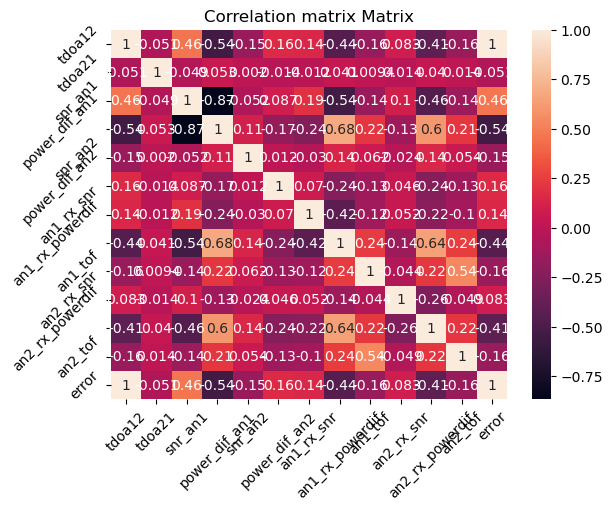

In [126]:
plt.figure()
cm = sns.heatmap(correlation_matrix, annot=True)

# Rotate x-axis and y-axis tick labels at a slight angle
cm.set_xticklabels(cm.get_xticklabels(), rotation=45)
cm.set_yticklabels(cm.get_yticklabels(), rotation=45)

plt.title('Correlation matrix Matrix')
plt.show()

## Compare the caused Error by each Material

In [127]:
error_df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

In [128]:
datasets = [cardboard_df, foam_df, metal_df, plastic_df, wooden_cabinet_df, wooden_shelf_df]

# Names or labels for each dataset
dataset_names = ['Cardboard', 'Foam', 'Metal', 'Plastic', 'Wooden Cabinet', 'Wooden Shelf']

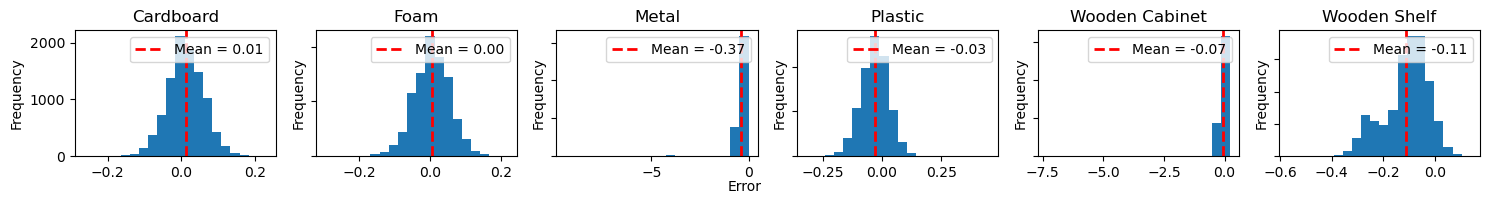

In [133]:
# Create subplots for each dataset
fig, axs = plt.subplots(1, 6, figsize=(15, 2))  # 1 rows, 6 columns

# Flatten the 3x2 array of subplots to simplify indexing
axs = axs.flatten()

# Iterate through each dataset and plot the histogram in individual subplots
for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    axs[i].hist(dataset['error'], bins=20)  # Adjust bins as needed
    axs[i].axvline(dataset['error'].mean(), color='red', linestyle='dashed', linewidth=2)
    axs[i].set_title(name)
    # Add a legend for the mean line
    mean = dataset['error'].mean()
    axs[i].legend([f'Mean = {mean:.2f}'], loc='upper right')

# Set common y labels only for the outermost subplots
for ax in axs.flat:
    ax.label_outer()
    ax.set_ylabel('Frequency')

# Add a single x-label at the bottom center
fig.text(0.5, 0.04, 'Error', ha='center', va='center')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


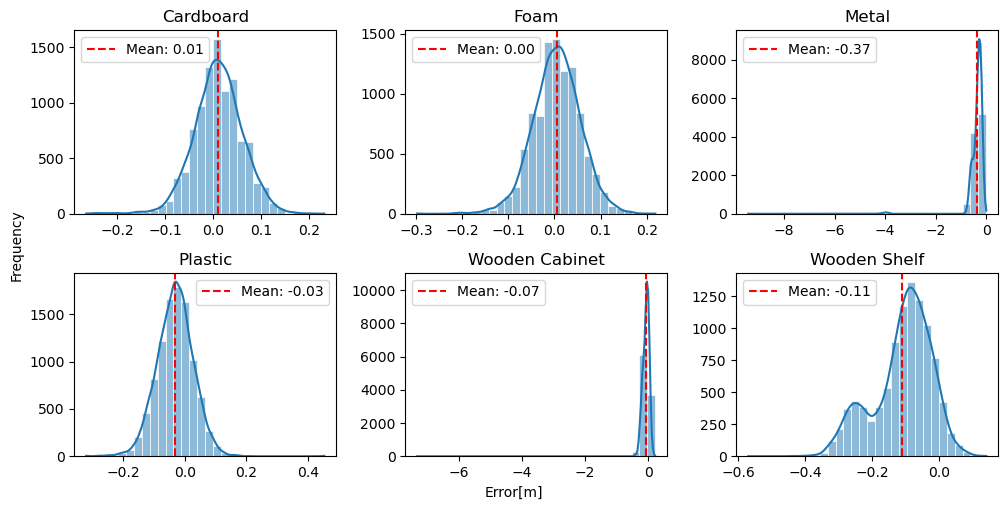

In [185]:
# Create subplots for each dataset
fig, axs = plt.subplots(2, 3, figsize=(10, 5))  # 1 rows, 6 columns

# Flatten the 3x2 array of subplots to simplify indexing
axs = axs.flatten()

# Iterate through each dataset and plot the histogram in individual subplots using Seaborn
for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    sns.histplot(data=dataset, x='error', bins=30, ax=axs[i], kde=True, edgecolor='white')
    axs[i].set_title(name)
    axs[i].set_xlabel('')  # Remove overall x-label   # Remove x-axis labels
    axs[i].set_ylabel('')

    # Calculate mean and plot a vertical line at the mean value
    mean_value = dataset['error'].mean()
    axs[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axs[i].legend()  # Show the mean value in the legend

# Hide inner x-axis labels and ticks
# for ax in axs.flat:
#    ax.label_outer()

# Add a single x-label at the bottom center
fig.text(0.5, 0.004, 'Error[m]', ha='center', va='center')
fig.text(0.003, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Comparing Variances

In [175]:
for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    print(dataset['error'].var())

0.002611506523311456
0.0026835212335159894
0.1338939074338241
0.00356599994905697
0.015076627836114855
0.007552924412730798
